In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder , StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
crop_data = pd.read_csv('/content/data/Crop Data.csv')


In [ ]:
columns = crop_data.columns
print(columns)


Index(['Crop', 'Soil Type', 'pH', 'Nitrogen (N) ppm', 'Potassium (K) ppm',
       'Phosphorus (P) ppm', 'Season', 'Duration (Months)'],
      dtype='object')


In [ ]:
crop_data.tail(10)

,Crop,Soil Type,pH,Nitrogen (N) ppm,Potassium (K) ppm,Phosphorus (P) ppm,Season,Duration (Months)
505,Rice,Laterite Soil,5.50,80.0,50.0,17.5,Winter Season,6
506,Rice,Laterite Soil,5.60,82.0,52.0,18.0,Winter Season,6
507,Rice,Laterite Soil,5.40,78.0,48.0,17.0,Winter Season,6
508,Rice,Laterite Soil,5.52,81.0,51.0,17.8,Winter Season,6
509,Rice,Laterite Soil,5.48,79.0,49.0,17.2,Winter Season,6
510,Rice,Laterite Soil,5.54,80.5,50.5,17.7,Winter Season,6
511,Rice,Laterite Soil,5.56,82.0,52.2,18.2,Winter Season,6
512,Rice,Laterite Soil,5.58,83.0,53.0,18.5,Winter Season,6
513,Rice,Laterite Soil,5.62,85.0,54.0,19.0,Winter Season,6
514,Rice,Laterite Soil,5.66,86.0,55.0,19.5,Winter Season,6


<Axes: xlabel='Nitrogen (N) ppm', ylabel='Soil Type'>

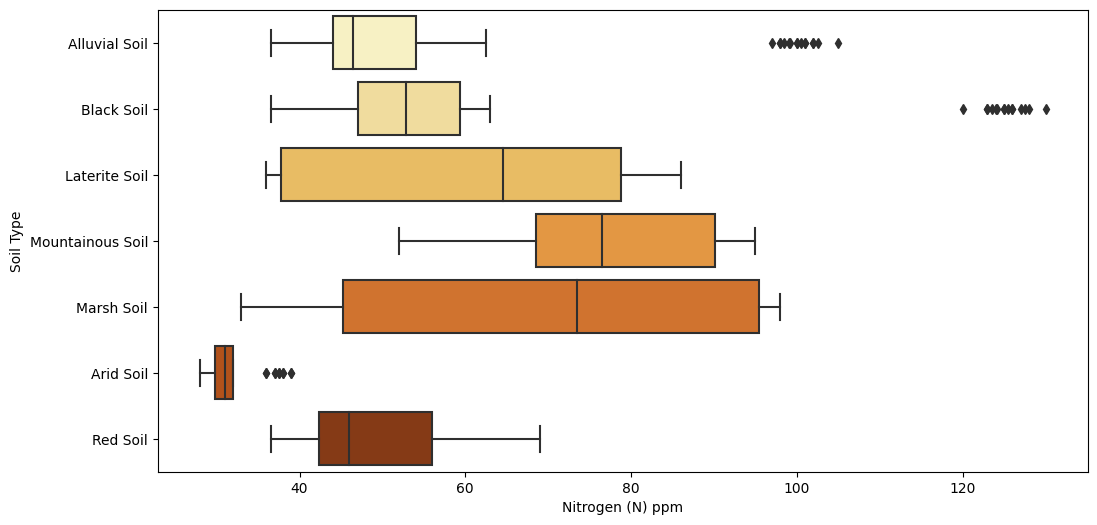

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Nitrogen (N) ppm",y="Soil Type",data=crop_data,palette="YlOrBr")

<Axes: xlabel='Potassium (K) ppm', ylabel='Soil Type'>

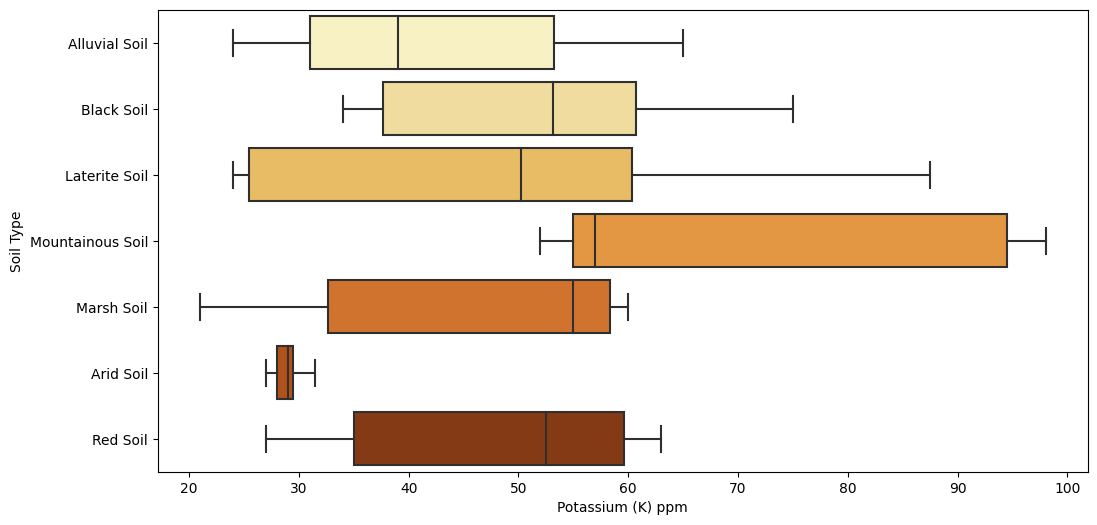

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Potassium (K) ppm",y="Soil Type",data=crop_data,palette="YlOrBr")

<Axes: xlabel='Phosphorus (P) ppm', ylabel='Soil Type'>

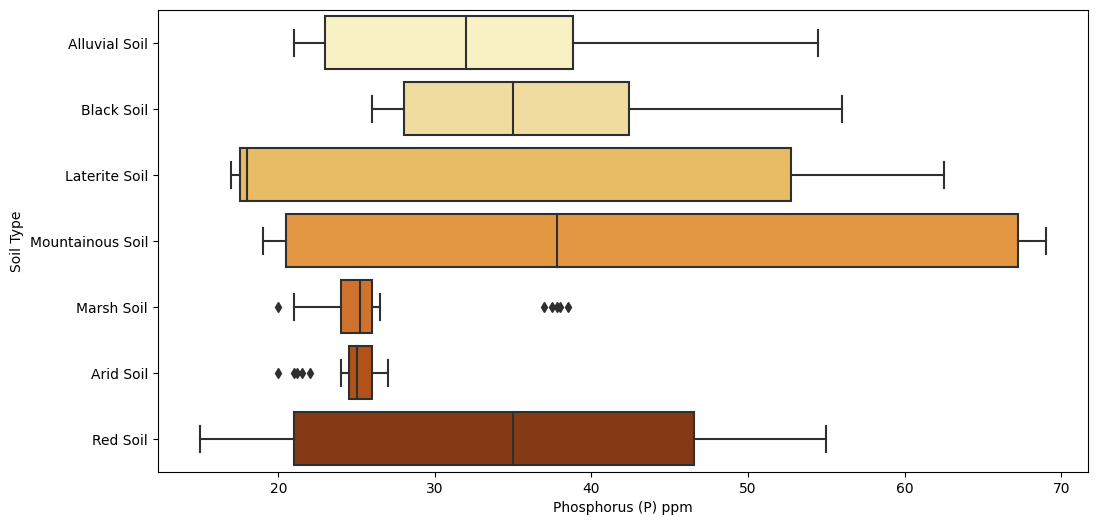

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Phosphorus (P) ppm",y="Soil Type",data=crop_data,palette="YlOrBr")

<Axes: xlabel='pH', ylabel='Soil Type'>

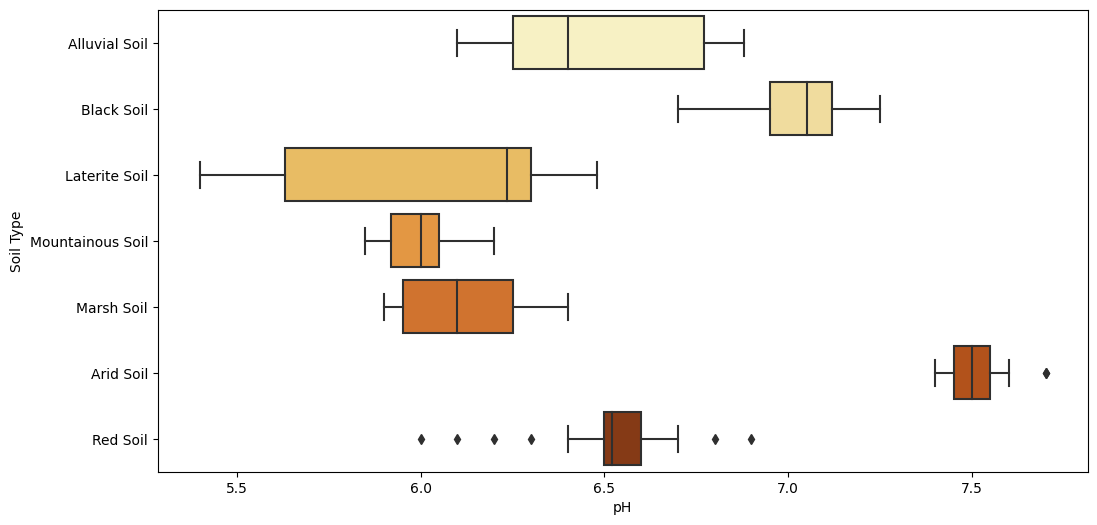

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="pH",y="Soil Type",data=crop_data,palette="YlOrBr")

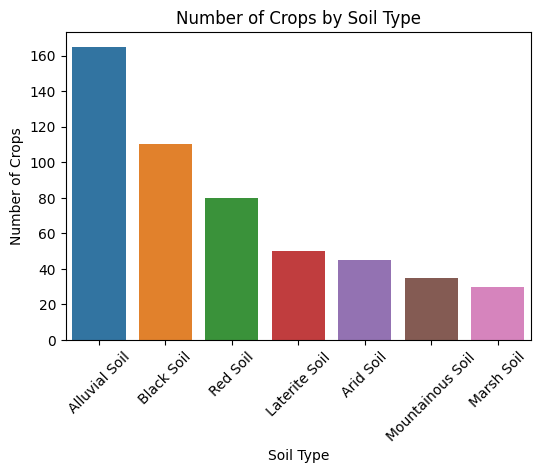

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Soil Type', data=crop_data, order=crop_data['Soil Type'].value_counts().index)
plt.title('Number of Crops by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Number of Crops')
plt.xticks(rotation=45)
plt.show()

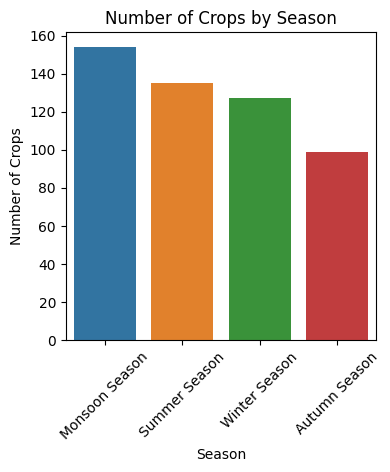

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Season', data=crop_data, order=crop_data['Season'].value_counts().index)
plt.title('Number of Crops by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crops')
plt.xticks(rotation=45)
plt.show()

In [ ]:
label_encoders = {}
categorical_columns = ['Soil Type', 'Season']
for col in categorical_columns:
    le = LabelEncoder()
    crop_data[col] = le.fit_transform(crop_data[col])
    label_encoders[col] = le

In [ ]:
scaler = StandardScaler()
numerical_columns = ['pH', 'Nitrogen (N) ppm', 'Potassium (K) ppm', 'Phosphorus (P) ppm', 'Duration (Months)']
crop_data[numerical_columns] = scaler.fit_transform(crop_data[numerical_columns])

In [ ]:
X = crop_data.drop('Crop', axis=1)
Y = crop_data['Crop']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
user_input = pd.DataFrame({'Soil Type': ['Red Soil'], 'pH': [6.3], 'Nitrogen (N) ppm': [10],
                          'Potassium (K) ppm': [30], 'Phosphorus (P) ppm': [10],
                          'Season': ['Summer Season'], 'Duration (Months)': [5]})


In [ ]:
for col in categorical_columns:
    user_input[col] = label_encoders[col].transform(user_input[col])

predicted_crops = [model.predict(user_input)[0]]


In [ ]:
# Display the predicted crop to the user
print("Predicted Crop 1:", predicted_crops[0])

Predicted Crop 1: Coffee


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you've already trained your model and have X_test and Y_test
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 87.38%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='micro')
recall = recall_score(Y_test, Y_pred, average='micro')
f1 = f1_score(Y_test, Y_pred, average='micro')


# Print evaluation metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Accuracy: 87.38%
Precision: 0.87
Recall: 0.87
F1 Score: 0.87


In [ ]:
nutrient_loss_data = pd.read_csv('data/crop nutrients loss.csv')
num_rotations = 4
previous_crop = None
label_encoders = {}
categorical_columns = ['Soil Type', 'Season']
for col in categorical_columns:
    le = LabelEncoder()
    user_input[col] = le.fit_transform(user_input[col])
    label_encoders[col] = le
print('Rotation crops:')
for i in range(1, num_rotations + 1):
    if i != 1:
        if previous_crop is not None:
            matching_rows = nutrient_loss_data[nutrient_loss_data['Crop'] == previous_crop]
            if not matching_rows.empty:
                nutrient_losses = matching_rows.iloc[0]
                pH_loss = nutrient_losses['pH Loss']
                nitrogen_loss = nutrient_losses['Nitrogen Loss (ppm)']
                phosphorus_loss = nutrient_losses['Phosphorus Loss (ppm)']
                potassium_loss = nutrient_losses['Potassium Loss (ppm)']
                new_pH = user_input['pH'] - pH_loss
                new_nitrogen = user_input['Nitrogen (N) ppm'] - nitrogen_loss
                new_phosphorus = user_input['Phosphorus (P) ppm'] - phosphorus_loss
                new_potassium = user_input['Potassium (K) ppm'] - potassium_loss
                user_input = pd.DataFrame({'Soil Type': user_input['Soil Type'], 'pH': new_pH, 'Nitrogen (N) ppm': new_nitrogen,
                                           'Potassium (K) ppm': new_potassium, 'Phosphorus (P) ppm': new_phosphorus,
                                           'Season': user_input['Season'], 'Duration (Months)': user_input['Duration (Months)']})
            else:
                print(f'No matching nutrient loss data found for Crop: {previous_crop}')
        else:
            print('No previous crop data available for the first rotation.')
    predicted_crops = model.predict(user_input)
    probs = model.predict_proba(user_input)
    sorted_indices = (-probs).argsort(axis=1)
    if predicted_crops[0] == previous_crop:
       Next_crop = model.classes_[sorted_indices[0][1]]
       print(f'Predicted Crop {i}:', Next_crop)
    else:
        Next_crop = predicted_crops[0]
        print(f'Predicted Crop {i}:', Next_crop)
    previous_crop = Next_crop


Rotation crops:
Predicted Crop 1: Coffee
Predicted Crop 2: Avocados
Predicted Crop 3: Cotton
Predicted Crop 4: Wheat


In [ ]:
k_values = [3,4, 5,6, 7, 10,15,25]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'Accuracy for k = {k}: {accuracy * 100:.2f}%')

Accuracy for k = 3: 82.52%
Accuracy for k = 4: 83.50%
Accuracy for k = 5: 85.44%
Accuracy for k = 6: 87.38%
Accuracy for k = 7: 82.52%
Accuracy for k = 10: 76.70%
Accuracy for k = 15: 72.82%
Accuracy for k = 25: 58.25%
